<a href="https://colab.research.google.com/github/wesha-904/Corizo-minor-project/blob/main/minor_project_corizo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPSTONE PROJECT 1

---

* **Name:** Anwesha Singh
* **Internship:** Corizo Data Science June'25(MENTOR-LED)
* **Mentor:** Aman Gupta

*Before each code chunk, briefly explain what its purpose is. After each code chunk,
summarise and discuss the obtained results (in a few sentences).*

# **1**. From https://github.com/gagolews/teaching-data/tree/master/marek download the
two following excerpts from the National Health and Nutrition Examination Survey
(NHANES dataset):

• nhanes_adult_male_bmx_2020.csv,

• nhanes_adult_female_bmx_2020.csv.

They give body measurements of adult males and females.

In [40]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy.stats import skew, iqr
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr
from scipy.stats import zscore

## 2. Read the two files as numpy matrices named male and female. Each matrix consists of seven columns:

i. weight (kg)

ii. standing height (cm)

iii. upper arm length (cm)

iv. upper leg length (cm)

v. arm circumference (cm)

vi. hip circumference (cm)

vii. waist circumference (cm)

In [41]:
# Load dataset directly from GitHub (no manual upload required)
# The file is hosted in a public GitHub repository using the raw content link
# This ensures the dataset is always accessible and avoids session-based file loss

url_male = 'https://raw.githubusercontent.com/wesha-904/Corizo-minor-project/main/nhanes_adult_male_bmx_2020.csv'
url_female = 'https://raw.githubusercontent.com/wesha-904/Corizo-minor-project/main/nhanes_adult_female_bmx_2020.csv'

# Read the CSV files with bad line skipping
# Using on_bad_lines='skip' to ignore malformed rows in the CSV file

df_male = pd.read_csv(url_male, on_bad_lines='skip')
df_female = pd.read_csv(url_female, on_bad_lines='skip')

In [42]:
# After reviewing the file, we found that the actual data starts from line 18,
# so we skip the first 18 lines which contain metadata or headers.
# Read the files as DataFrames, skipping metadata rows (18 lines)
male_clean = pd.read_csv(url_male, skiprows=18)
male_clean.head()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,98.8,182.3,42.0,40.1,38.2,108.2,120.4
1,74.3,184.2,41.1,41.0,30.2,94.5,86.8
2,103.7,185.3,47.0,44.0,32.0,107.8,109.6
3,86.0,167.8,39.5,38.4,29.0,106.4,108.3
4,99.4,181.6,40.4,39.9,36.0,120.2,107.0


In [43]:
female_clean = pd.read_csv(url_female, skiprows=18)
female_clean.head()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2


In [44]:
# Convert DataFrames to NumPy matrices
male = male_clean.to_numpy()
female = female_clean.to_numpy()

print("Male shape:", male.shape)
print("Female shape:", female.shape)

Male shape: (4081, 7)
Female shape: (4221, 7)


# 3. On a single plot (use matplotlib.pytplot.subplot), draw two histograms: for female weights (top subfigure). and for male weights (bottom subfigure) Call matplotlib.pyplot.xlim to make the xaxis limits identical for both subfigures (work out the appropriate limits yourself).

In [45]:
# Column names and their corresponding column numbers:
# 0. 'BMXWT'     -> weight (kg)
# 1. 'BMXHT'     -> standing height (cm)
# 2. 'BMXARML'   -> upper arm length (cm)
# 3. 'BMXLEG'    -> upper leg length (cm)
# 4. 'BMXARMC'   -> arm circumference (cm)
# 5. 'BMXHIP'    -> hip circumference (cm)
# 6. 'BMXWAIST'  -> waist circumference (cm)

# Extracting weight values from both datasets
female_weights = female[:, 0]
male_weights = male[:, 0]

In [46]:
# Find the minimum weight across both female and male datasets
min_wt = min(female_weights.min(), male_weights.min())

# Find the maximum weight across both datasets
max_wt = max(female_weights.max(), male_weights.max())

# Define common x-axis limits with a 5 kg padding on both sides
x_limits = (min_wt - 5, max_wt + 5)

x_limits

(np.float64(27.6), np.float64(209.6))

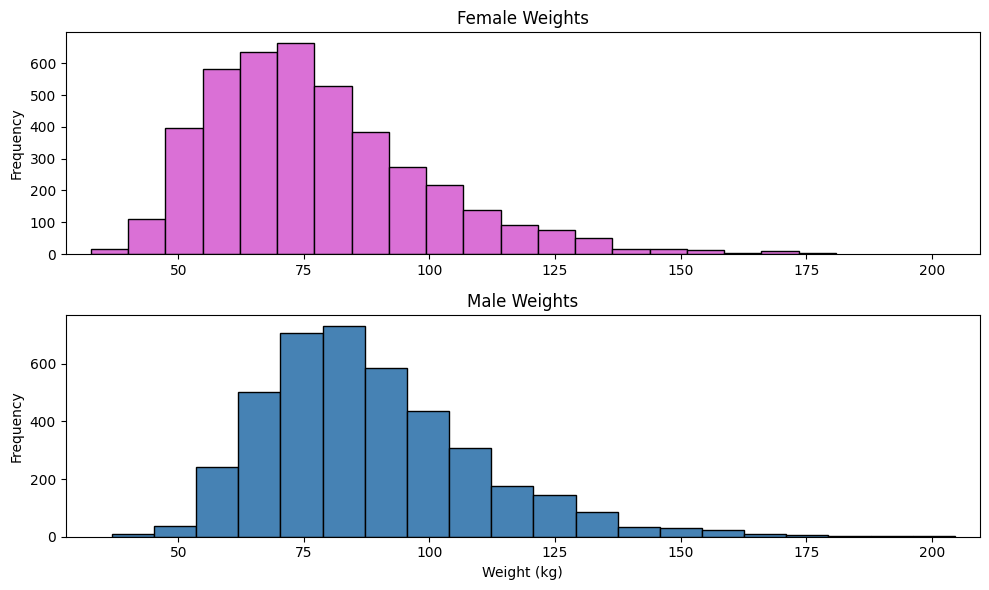

In [47]:
plt.figure(figsize=(10, 6))
# Set up a 2-row, 1-column layout for the overall figure.

# Each subplot will hold one histogram:

plt.subplot(2, 1, 1)  #This is the 1std plot in the 2-row layout (top)
# - The first (top) subplot is for female weights
plt.hist(female_weights, bins=20, color='orchid', edgecolor='black')
plt.title("Female Weights")
plt.xlim(x_limits)
plt.ylabel("Frequency")

plt.subplot(2, 1, 2) #This is the 2nd plot in the 2-row layout (bottom)
# - The second (bottom) subplot is for male weights
plt.hist(male_weights, bins=20, color='steelblue', edgecolor='black')
plt.title("Male Weights")
plt.xlim(x_limits)
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")

plt.tight_layout() # Prevents overlapping text/plots (like axis labels and titles).
plt.show()

# 4. Call matplotlib.pyplot.boxplot to draw a box-and-whisker plot, with two boxes side by side, giving the male and female weights so that they can be compared to each other.Note that the boxplot function can be fed with a list of two vectors like [female_weights,male_weights]. In your own words, discuss the results.


/tmp/ipython-input-48-3653342601.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights],


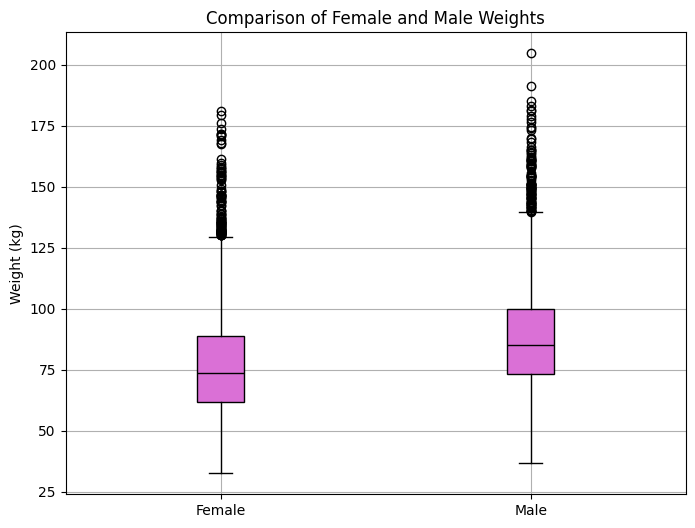

In [48]:
plt.figure(figsize=(8, 6))

# Create the boxplot
plt.boxplot([female_weights, male_weights],
            labels=['Female', 'Male'],
            patch_artist=True,
            boxprops=dict(facecolor='orchid'),
            medianprops=dict(color='black'))
plt.title("Comparison of Female and Male Weights")
plt.ylabel("Weight (kg)")
plt.grid(True)

plt.show()


In [49]:
# Results and Observation from BOXPLOT
# The median weight for males is higher than that of females
# The Inter Quartile Range i.e the size of boxes are similar therefore similar variations in both male and female weights
# Both male and female weights seem to have similar amount of outliers, with a notably large presence in each group

# 5. Compute the basic numerical aggregates of the male and female weights (measures of location, dispersion, and shape). In your own words, describe and compare the two distributions (e.g., are they left skewed, which one has more dispersion, and so forth).

In [50]:
#Location: mean, median
#Dispersion: standard deviation, range, IQR
#Shape: skewness

def describe_weights(data, label):
    print(f"\n--- {label} ---")
    print(f"Mean: {np.mean(data):.2f}")
    print(f"Median: {np.median(data):.2f}")
    print(f"Standard Deviation: {np.std(data, ddof=1):.2f}")
    print(f"Range: {np.max(data) - np.min(data):.2f}")
    print(f"IQR (Interquartile Range): {iqr(data):.2f}")
    print(f"Skewness: {skew(data):.2f}")

describe_weights(female_weights, "Female Weights")
describe_weights(male_weights, "Male Weights")


--- Female Weights ---
Mean: 77.40
Median: 73.60
Standard Deviation: 21.55
Range: 148.30
IQR (Interquartile Range): 27.10
Skewness: 1.03

--- Male Weights ---
Mean: 88.36
Median: 85.00
Standard Deviation: 21.42
Range: 167.80
IQR (Interquartile Range): 26.50
Skewness: 0.98


In [51]:
# OBSERVATIONS for Female Weights:
# The average weight is about 77.4 kg, while the middle value (median) is 73.6 kg. Since the mean is a bit higher than the median, it suggests that a few people weigh quite a bit more, pulling the average up.
# The standard deviation is 21.55, which means weights are spread out around the average by about 21 kg.
# The range is very large: about 148 kg, showing there's a big gap between the lightest and heaviest female.
# The IQR is 27.1, so the middle 50% of values fall within a 27 kg range.
# The skewness is 1.03, which means the data is right-skewed — most women have weights on the lower side, with a few having much higher weights.

# OBSERVATIONS for Male Weights:
# The average weight is higher, at 88.36 kg, and the median is 85 kg — again, the average is a bit higher than the middle value, suggesting some higher weights are stretching the mean upward.
# The range is even larger at 167.8 kg, showing a wider spread between the lightest and heaviest male.
# The IQR is 26.5, which means the middle 50% of male weights fall within a 26.5 kg range — showing a moderate spread around the center.
# The skewness is 0.98, indicating a right-skewed distribution — most male weights are on the lower side, but a few individuals weigh significantly more, pulling the tail to the right.

# OVERALL OBSERVATIONS:
# Males are heavier on average than females.
# Both male and female weights are spread out in a similar way, especially in the middle range (IQR).
# Both distributions are right-skewed, meaning there are a few individuals with very high weights.

# 6. To the female matrix, add the eight column which gives the body mass indices of all the female participants.

In [52]:
# Extract weight (column 0) and height in cm (column 1)
female_weights = female[:, 0]
female_heights_cm = female[:, 1]

# Convert height to meters
female_heights_m = female_heights_cm / 100

# Compute BMI
female_bmi = female_weights / (female_heights_m ** 2)

# Add BMI as the 8th column (index 7)
female_with_bmi = np.column_stack((female, female_bmi))

# Check the shape and a few rows
print("New shape with BMI:", female_with_bmi.shape)
print(female_with_bmi[:5])

New shape with BMI: (4221, 8)
[[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132]]


In [53]:
# Print only the BMI column (last column)
print("First 5 BMI values:")
print(female_with_bmi[:5, -1])

First 5 BMI values:
[37.83504078 39.06972037 28.09265496 24.90437849 23.17879132]


# 7. Create a new matrix zfemale being a version of the female dataset with all its columns standardised (by computing the z-scores of each column).


In [54]:
# Compute column-wise means and standard deviations
means = np.mean(female, axis=0)
stds = np.std(female, axis=0, ddof=1)  # ddof=1 for sample std deviation

# Compute z-scores
zfemale = (female - means) / stds

# Display shape and a few rows
print("Shape of standardized female matrix:", zfemale.shape)
print("First 5 rows of zfemale:")
print(zfemale[:5])

Shape of standardized female matrix: (4221, 7)
First 5 rows of zfemale:
[[ 0.91418677  0.00894932 -0.56732742  1.13285382  0.55078021  1.08303325
   1.11565244]
 [ 0.63570067 -1.05294368 -1.07880364 -1.29333838  1.03209576  1.04463152
   0.26505759]
 [-0.20439908  0.15053505  0.58349407  0.26191303 -0.16227987 -0.1906243
  -0.37288855]
 [-0.72888124 -0.38749073  0.83923218 -0.7645529  -0.66142193 -0.52343933
  -0.45909748]
 [-1.02129166 -0.78393078 -0.60995044 -0.98228809 -0.78620744 -1.06746392
  -1.4533739 ]]


# 8. Draw a scatterplot matrix (pairplot) for the standardised versions of height, weight, waist circumference, hip circumference, and BMI of the females (based on zfemale).Compute Pearson’s and Spearman’s correlation coefficients for all pairs of variables.Interpret the obtained results.


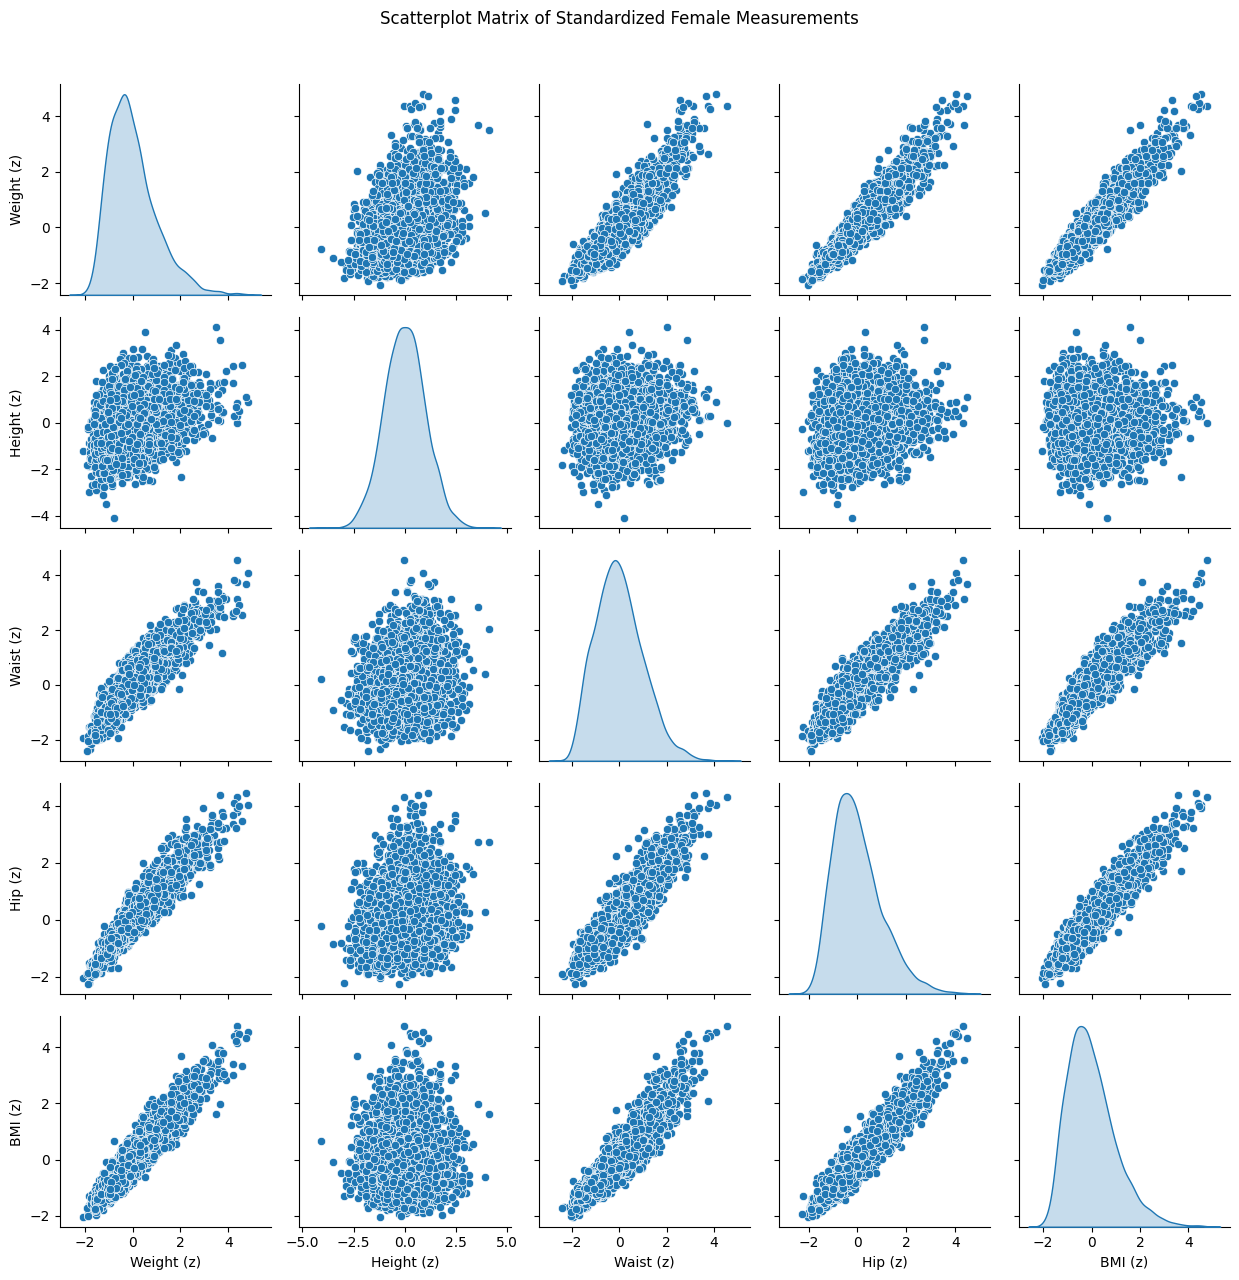

In [55]:
# Standardize BMI separately
female_bmi_z = (female_bmi - np.mean(female_bmi)) / np.std(female_bmi, ddof=1)

# Create DataFrame for the 5 standardized features
z_df = pd.DataFrame({
    'Weight (z)': zfemale[:, 0],
    'Height (z)': zfemale[:, 1],
    'Waist (z)': zfemale[:, 6],
    'Hip (z)': zfemale[:, 5],
    'BMI (z)': female_bmi_z
})

# Plot the pairplot
sns.pairplot(z_df, diag_kind='kde')
plt.suptitle("Scatterplot Matrix of Standardized Female Measurements", y=1.02)
plt.tight_layout()
plt.show()

In [56]:
# Pearson correlation matrix
pearson_corr = z_df.corr(method='pearson')

# Spearman correlation matrix
spearman_corr = z_df.corr(method='spearman')

print("\n--- Pearson Correlation ---")
print(pearson_corr.round(2))

print("\n--- Spearman Correlation ---")
print(spearman_corr.round(2))


--- Pearson Correlation ---
            Weight (z)  Height (z)  Waist (z)  Hip (z)  BMI (z)
Weight (z)        1.00        0.35       0.90     0.95     0.95
Height (z)        0.35        1.00       0.13     0.20     0.03
Waist (z)         0.90        0.13       1.00     0.90     0.92
Hip (z)           0.95        0.20       0.90     1.00     0.94
BMI (z)           0.95        0.03       0.92     0.94     1.00

--- Spearman Correlation ---
            Weight (z)  Height (z)  Waist (z)  Hip (z)  BMI (z)
Weight (z)        1.00        0.34       0.90     0.95     0.94
Height (z)        0.34        1.00       0.11     0.21     0.02
Waist (z)         0.90        0.11       1.00     0.89     0.92
Hip (z)           0.95        0.21       0.89     1.00     0.93
BMI (z)           0.94        0.02       0.92     0.93     1.00


In [57]:
# OBSERVATIONS
# Weight and BMI have a strong positive correlation (close to 0.9 or above) in both Pearson and Spearman — as weight increases, BMI increases.
# Height and BMI may show a weak or even negative correlation — because BMI adjusts for height, taller individuals may have lower BMI even if they weigh more.
# Waist and BMI also show a strong positive correlation, because central fat contributes to BMI.
# Pearson shows linear relationships; Spearman shows monotonic (rank-based) — if they're similar, relationships are linear and consistent.

# 9. Compute the waist circumference to height ratio and the waist circumference to hip circumference ratio of the male and female participants by adding two more columns to the males and females matrices.

In [58]:
# Female Ratios
female_waist = female[:, 6]     # BMXWAIST
female_height = female[:, 1]    # BMXHT
female_hip = female[:, 5]       # BMXHIP

female_whtr = female_waist / female_height
female_whr = female_waist / female_hip

# Add as 8th and 9th columns
female_with_ratios = np.column_stack((female, female_whtr, female_whr))

# Male Ratios
male_waist = male[:, 6]         # BMXWAIST
male_height = male[:, 1]        # BMXHT
male_hip = male[:, 5]           # BMXHIP

male_whtr = male_waist / male_height
male_whr = male_waist / male_hip

# Add as 8th and 9th columns
male_with_ratios = np.column_stack((male, male_whtr, male_whr))

# Show a few rows
print("Female shape with ratios:", female_with_ratios.shape)
print("First 3 rows (female):")
print(female_with_ratios[:3])

print("\nMale shape with ratios:", male_with_ratios.shape)
print("First 3 rows (male):")
print(male_with_ratios[:3])

Female shape with ratios: (4221, 9)
First 3 rows (female):
[[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9          0.73595506   0.93497224]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1          0.67518009   0.82151394]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.           0.5707196    0.86629002]]

Male shape with ratios: (4081, 9)
First 3 rows (male):
[[ 98.8        182.3         42.          40.1         38.2
  108.2        120.4          0.66044981   1.11275416]
 [ 74.3        184.2         41.1         41.          30.2
   94.5         86.8          0.47122693   0.91851852]
 [103.7        185.3         47.          44.          32.
  107.8        109.6          0.59147329   1.01669759]]


# 10. Draw a box-and-whisker plot with four boxes side by side, comparing the distribution of the waist-to-height ratio and the waist-to-hip ratio of both male and female participants.Explain what you see.

/tmp/ipython-input-59-1674007212.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=labels, patch_artist=True,


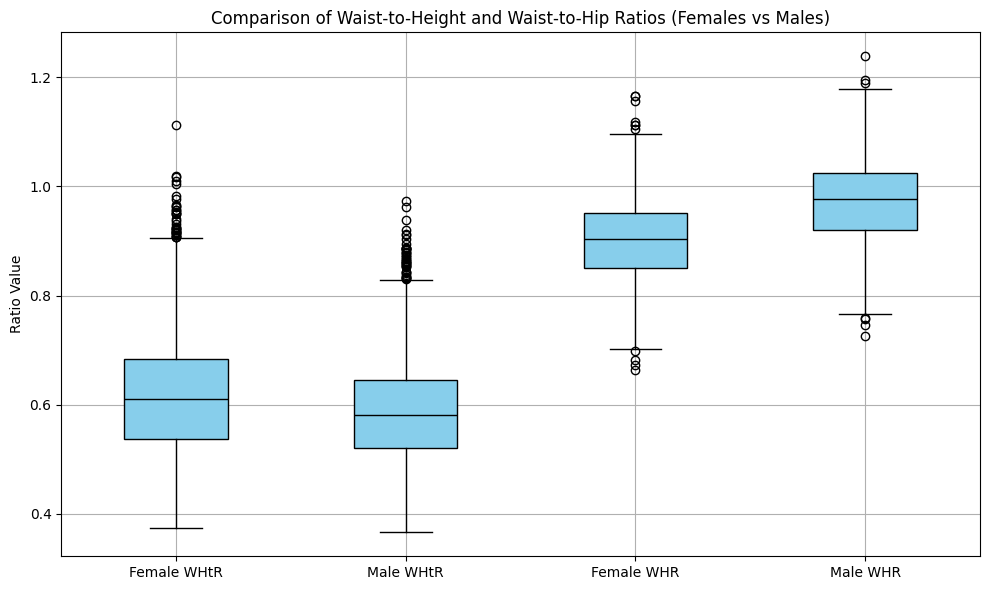

In [59]:
# Grouped data: [female WHtR, male WHtR, female WHR, male WHR]
box_data = [
    female_whtr,   # Female Waist-to-Height
    male_whtr,     # Male Waist-to-Height
    female_whr,    # Female Waist-to-Hip
    male_whr       # Male Waist-to-Hip
]

# Corresponding labels
labels = ['Female WHtR', 'Male WHtR', 'Female WHR', 'Male WHR']

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(box_data, labels=labels, patch_artist=True,
            boxprops=dict(facecolor='skyblue'),
            medianprops=dict(color='black'))

plt.title("Comparison of Waist-to-Height and Waist-to-Hip Ratios (Females vs Males)")
plt.ylabel("Ratio Value")
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
# WHtR (Waist-to-Height Ratio):
# Males and females may have similar median WHtR, but males might show a slightly wider spread.
# Both groups have many people whose waist size is much larger than expected for their height — these are shown as outliers on the plot.
# There are many outliers (the small circles above the boxes) in both groups. These represent people with larger waists compared to their height than most others.

# WHR (Waist-to-Hip Ratio):
# In general, males have a higher WHR than females.
# The WHR values for females are often lower and more consistent.
# Males also have more extreme outliers, with a few having a very high WHR.

# 11. In your own words, list some advantages and disadvantages of BMI, waist-to-height ratio, and waist-to-hip ratio.

In [61]:
# BMI (Body Mass Index)
# ADVANTAGES:
    # Easy to compute with just height and weight — we added it as a new column quickly.
    # Gave a rough idea of who might be overweight or underweight.

# DISADVANTAGES:
    # Doesn’t tell us where the fat is located — it treats all weight the same.
    # Some participants with a high BMI might actually have more muscle, not fat.
    # Misses people with normal BMI but high abdominal fat, which we could only see using WHtR or WHR.

# Waist-to-Height Ratio (WHtR)
# ADVANTAGES:
    # Helped us spot people with more central (abdominal) fat, even if their BMI seemed normal.
    # Gave a clear difference in fat distribution when we looked at male vs. female boxplots.
# DISADVANTAGES:
    # Since waist measurements can vary based on how they’re taken, there might be inconsistencies.
    # We saw many outliers, which means WHtR can show a lot of variation.

# Waist-to-Hip Ratio (WHR)
# ADVANTAGES:
    # Helped show the difference in body shapes between males and females.
    # Revealed that some males had unusually high waist sizes compared to hips, which BMI wouldn’t show.
# DISADVANTAGES:
    # Took more effort to measure both waist and hip accurately.
    # While it showed shape differences, it wasn’t always clear what health risk level each WHR meant.

# 12. Print out the standardised body measurements for the 5 persons with the lowest BMI and the 5 persons with the 5 highest BMI (e.g., call print for a subset of zfemale comprised of 10 chosen rows as determined by a call to numpy.argsort). Interpret the results.

In [62]:
# Get sorted BMI indices
female_bmi_sorted = np.argsort(female_bmi)

# Get 5 lowest and 5 highest BMI indices
female_extremes = np.concatenate((female_bmi_sorted[:5], female_bmi_sorted[-5:]))

# Print standardized measurements of those individuals
print("Standardized Female Body Measurements (Lowest and Highest 5 BMI):\n")
print(zfemale[female_extremes])

Standardized Female Body Measurements (Lowest and Highest 5 BMI):

[[-2.07953885 -1.22284656 -1.54765684 -1.16891826 -2.1945011  -2.04030787
  -1.94189121]
 [-1.87995715 -0.18927071 -1.71814891  0.38633315 -2.44407213 -1.85469949
  -2.05683646]
 [-1.53649095  1.80708812  0.62611709  0.57296331 -2.26580711 -1.67549139
  -1.70625345]
 [-1.84282567 -0.26006357 -0.22634327  0.51075326 -2.30146012 -2.25151742
  -1.85568227]
 [-1.61075391  0.88678086 -0.09847422  0.47964823 -2.21232761 -1.82909833
  -1.71200071]
 [ 4.24673716  0.29212078  1.86218462 -0.98228809  2.36908342  4.10396975
   3.81686582]
 [ 4.45560174  0.50449938  1.69169255 -1.13781323  3.34954103  3.98236426
   2.90305108]
 [ 4.34884874  0.27796221  2.84251404  1.94158455  4.36565164  3.91836137
   3.75364593]
 [ 4.80370937  0.88678086  2.11792273  1.81716444  3.77737708  4.02076599
   4.0812399 ]
 [ 4.36277304 -0.0335264  -0.0558512  -0.17355736  2.77909296  4.31517929
   4.56975721]]


In [63]:
# Negative number = below average , Positive number = above average

# For the 5 females with the LOWEST BMI:
# All their z-scores are strongly negative, especially for weight, waist, and BMI.
# This means they are much thinner than average — lighter weight, smaller waist and hips, and shorter height in some cases.

# For the 5 females with the HIGHEST BMI:
# Their z-scores for weight, waist, and BMI are all strongly positive
#This tells us these women have much higher body fat compared to average.

In [64]:
#Compute BMI and add to male matrix ---
male_weights = male[:, 0]
male_heights_cm = male[:, 1]
male_heights_m = male_heights_cm / 100

# Avoid divide-by-zero just in case
male_bmi = np.where(male_heights_m > 0, male_weights / (male_heights_m ** 2), np.nan)

# Add BMI as 8th column
male_with_bmi = np.column_stack((male, male_bmi))

# Standardize all 8 columns (z-scores) ---
zmale = zscore(male_with_bmi, axis=0)

# Find 5 lowest and 5 highest BMI people ---
male_extremes = np.concatenate((male_bmi_sorted[:5], male_bmi_sorted[-5:]))

# Print standardized body measurements ---
print("\nStandardized Male Body Measurements (Lowest and Highest 5 BMI):\n")
print(zmale[male_extremes])



Standardized Male Body Measurements (Lowest and Highest 5 BMI):

[[-2.40742777 -2.18326577 -0.70413304 -0.3550302  -3.20457542 -2.04704292
  -1.31747631 -2.25481139]
 [-1.88919476  0.54466985 -0.4167394   0.51602641 -2.47313677 -1.80953939
  -1.91002404 -2.22194907]
 [-1.81449451  0.68824541 -0.49885187  0.92044555 -2.49403502 -1.84229849
  -2.07932339 -2.17225565]
 [-1.93588242  0.04868155 -0.4167394  -0.32392103 -2.41044203 -1.99790426
  -2.0914162  -2.16852329]
 [-2.20200207 -1.46538798 -2.01793256 -0.69723101 -2.43134027 -2.00609404
  -2.15188025 -2.14825837]
 [ 4.01679402 -0.05573704  0.4043853  -0.57279435  2.4797478   4.07891038
   3.2233741   4.57212239]
 [ 4.34360763  0.12699549  1.75924106  1.1382097   3.2320847   4.00520238
   3.39267345  4.7884639 ]
 [ 3.32581668 -1.50454495 -1.15575163 -0.63501268  2.5215443   4.40650146
   3.04802834  4.98190486]
 [ 4.81048422  0.25751873  0.15804789  1.6670655   4.02621809  4.30003436
   3.61639044  5.19437961]
 [ 5.42676131  0.20530944

In [65]:
# Negative number = below average, Positive number = above average

# For the 5 males with the LOWEST BMI:
# Most values are strongly negative — especially for weight, waist, and BMI.
# This means these men are much thinner than average.
# Overall, they have much lower body fat and are likely underweight.

# For the 5 males with the HIGHEST BMI:
# Most values are strongly positive — especially for weight, waist, hip, and BMI.
# This means these men are much heavier than average.
# Height is close to average.
# Overall, these men are likely overweight or have more body mass than others.